<a href="https://colab.research.google.com/github/RahulDhiman93/Profaid-Model/blob/main/PROFAID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install tensorflow scikit-learn

In [ ]:
pip install seaborn

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf

df = pd.read_csv('/content/drive/MyDrive/LLM.csv')
df = df.dropna()

print(df, "\n")

X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(max_features=100000, ngram_range=(1, 1), min_df=1, max_df=0.2)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

                                                   Text    Label
0                      y r u always l8 to the meetings?  student
1     The project team embraced a user-centric desig...       ai
2     i dont like dealing with risks, it's too stres...  student
3      i dont worry about reliability, it's good enough  student
4     i dont care about human-centered design, just ...  student
...                                                 ...      ...
1098  The development of quantum encryption ensures ...       ai
1099  i dont care about social media, just give me t...  student
1100  i dont care about multi-method approaches, jus...  student
1101  i dont understand variables, just give me the ...  student
1102      i dont worry about encryption, it's overrated  student

[1102 rows x 2 columns] 

Accuracy: 1.0


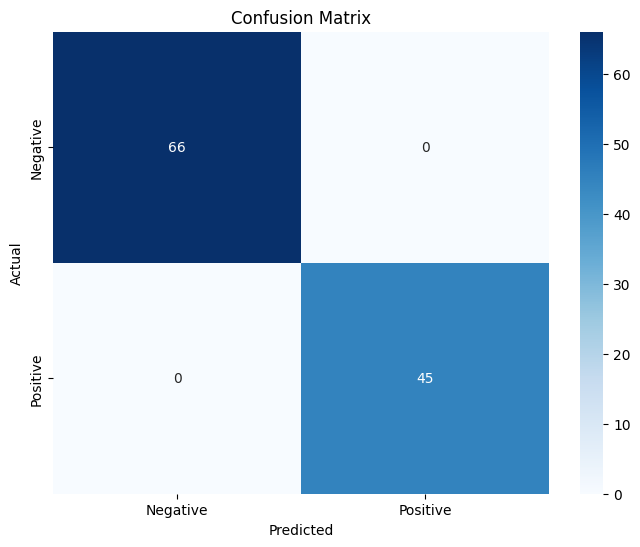

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
random_string = "hey I wrote this text guess I'am a student or AI?"

new_text_vectorized = vectorizer.transform([random_string])

predicted_label = model.predict(new_text_vectorized)[0]

print(f"Random String: {random_string}")
print(f"Predicted Label: {predicted_label}")

Random String: hey I wrote this text guess I'am a student or AI?
Predicted Label: student


In [95]:
joblib.dump(model, '/content/drive/MyDrive/profaid_prod_model.joblib')

['/content/drive/MyDrive/profaid_prod_model.joblib']

In [96]:
joblib.dump(vectorizer, '/content/drive/MyDrive/profaid_prod_vectorizer.joblib')

['/content/drive/MyDrive/profaid_prod_vectorizer.joblib']

In [87]:
X_processed = vectorizer.transform(X).toarray()

graph = tf.Graph()
with graph.as_default():
    input_features = tf.convert_to_tensor(X_processed, dtype=tf.float32)

    model = tf.Module()
    model.predict = tf.function(lambda x: your_model_predict_function(x))
    tf.saved_model.save(model, 'Profaid_Prod')